In [21]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

In [34]:
df = pd.read_csv('D:/ts_pronte_si_spera.csv', index_col='id', nrows=10000)
df0 = pd.read_csv('flat_df_no_nulli.csv', index_col=0)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,7990,7991,7992,7993,7994,7995,7996,7997,7998,7999
id,,,,,,,,,,,,,,,,,,,,,
2,15,15,15,15,15,15,15,16,14,15,...,31,13,1,0,26,31,31,27,0,0
3,15,15,15,15,15,16,15,14,13,24,...,16,15,14,17,14,15,18,14,16,16
5,15,15,15,15,15,15,16,16,16,13,...,24,22,18,17,10,19,17,21,18,13
10,15,16,16,16,15,14,12,22,10,15,...,20,13,13,18,19,14,11,19,16,12
20,16,16,20,22,10,0,0,17,29,31,...,3,6,24,17,19,23,13,12,3,21


In [36]:
indici_rock  = df0[df0["TRACK_genre_top"] == "Rock"].index
indici_experimental  = df0[df0["TRACK_genre_top"] == "Experimental"].index

In [43]:
df_rock = df[df.index.isin(indici_rock)]
df_experimental = df[df.index.isin(indici_experimental)]
df_unito = df_rock.append(df_experimental)

In [46]:
df_rock

,0,1,2,3,4,5,6,7,8,9,...,7990,7991,7992,7993,7994,7995,7996,7997,7998,7999
id,,,,,,,,,,,,,,,,,,,,,
135,16,16,16,16,16,16,17,23,18,3,...,16,21,11,12,16,20,18,15,14,12
136,16,16,16,15,16,15,15,12,15,24,...,9,11,24,10,21,12,19,18,14,12
151,15,16,16,10,23,12,16,18,12,20,...,20,4,23,31,12,12,21,15,11,17
152,15,16,16,16,14,15,18,17,12,16,...,25,16,17,12,16,4,17,8,24,5
153,15,16,17,11,18,16,18,12,11,25,...,18,15,13,21,13,12,14,21,16,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22954,15,16,17,14,16,10,23,16,12,12,...,9,23,23,14,16,4,15,27,10,26
23037,15,15,15,19,7,24,13,4,28,14,...,10,18,23,16,12,9,18,24,16,12
23041,15,16,17,14,19,14,18,15,10,9,...,6,10,24,23,2,16,22,18,8,12


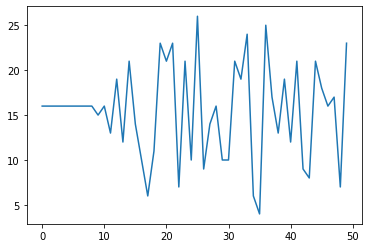

In [83]:
plt.plot(df_rock[df_rock.index == 4602].T.values[0:50])

In [60]:
df_unito = df_unito.drop(4602)

# Clustering

## Shape-based Clustering

In [20]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.generators import random_walks

In [61]:
X = df_unito.values

In [62]:
km = TimeSeriesKMeans(n_clusters=2, metric="euclidean", max_iter=5, random_state=0)
km.fit(X)

TimeSeriesKMeans(max_iter=5, n_clusters=2, random_state=0)

In [63]:
km.cluster_centers_.shape

(2, 8000, 1)

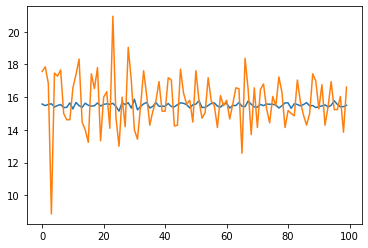

In [64]:
plt.plot(np.squeeze(km.cluster_centers_).T[7000:7100])
plt.show()

In [65]:
unique, counts = np.unique(km.labels_, return_counts=True)
unique, counts

(array([0, 1], dtype=int64), array([3521,   21], dtype=int64))

In [55]:
np.where(km.labels_==0)

(array([2732], dtype=int64),)

In [59]:
df.index[2732]

4602

In [53]:
km.inertia_

337183.3131216178

In [79]:
km_dtw = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=5, random_state=0)
km_dtw.fit(X)

KeyboardInterrupt: 

In [ ]:
plt.plot(np.squeeze(km_dtw.cluster_centers_).T)
plt.show()

In [ ]:
km_dtw.labels_

In [ ]:
km_dtw.inertia_